In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset cloumns
The dataset has columns such as Unnamed: 0, airline, flight, source_city, 
departure_time, stops, arrival_time, destination_city,
class, duration, days_left, and price

## flight price prediction

In [12]:
df=pd.read_csv("data/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
df.flight.max()


'UK-996'

In [15]:
df.departure_time.max()

'Night'

In [ ]:
df.destination_city()


In [ ]:
df.price.max()

In [ ]:
df.source_city.max()

 ## Bar Plot: Average price by airline.
Line Plot: Number of days left until departure versus price.
Scatter Plot: Duration versus price, possibly colored by the number of stops.
Histogram: Distribution of flight prices.

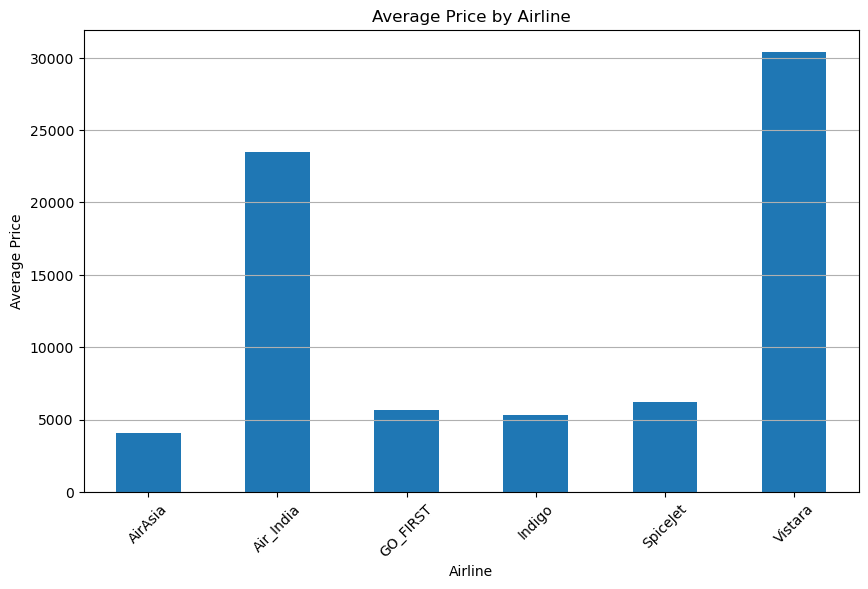

In [24]:
 # Grouping by 'airline' and calculating the average 'price'
avg_price_by_airline = df.groupby('airline')['price'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
avg_price_by_airline.plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

df['duration']: Represents the duration of the flight.

df['price']: Represents the price of the flight.

c=df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2}): The color of the points, mapped according to the number of stops.

cmap='viridis': The color map used for the plot.

alpha=0.6: The transparency of the points.

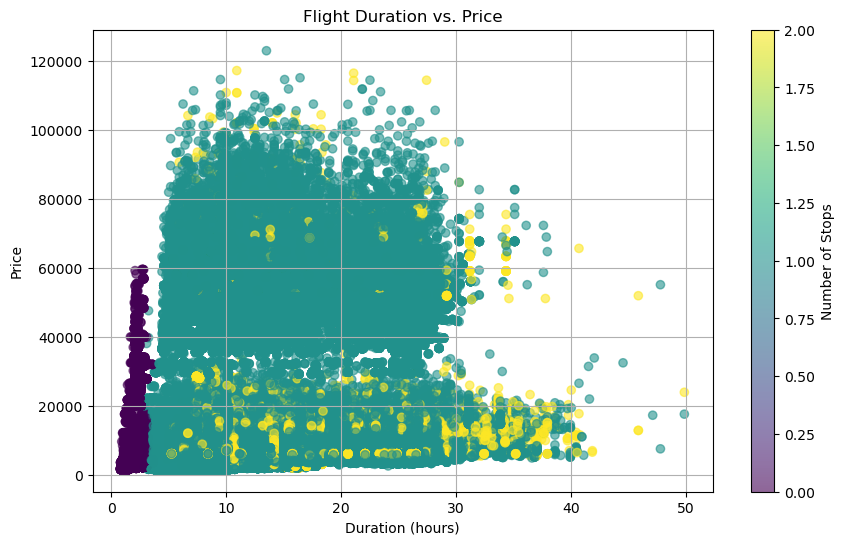

In [27]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['price'], c=df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2}), cmap='viridis', alpha=0.6)
plt.colorbar(label='Number of Stops')
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

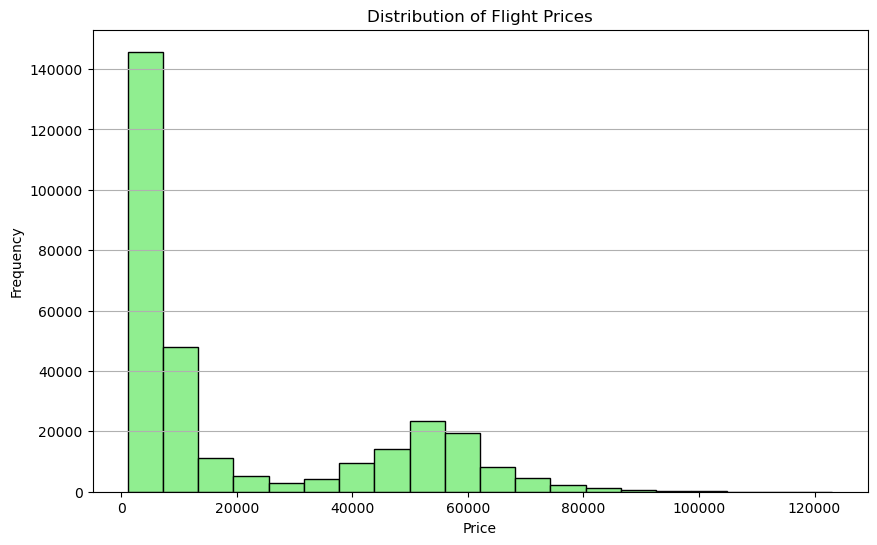

In [28]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='airline', y='price', estimator='mean')
sns.set_style("dark")

plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

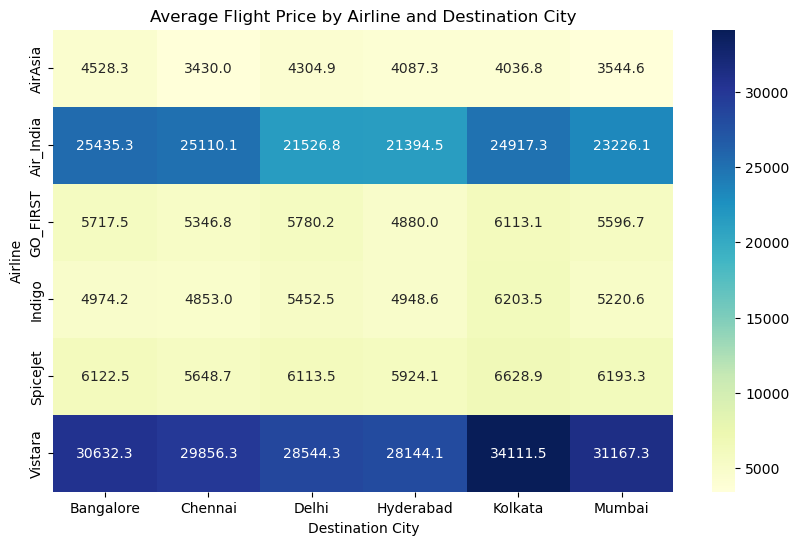

In [30]:
# Pivot the data for the heatmap
pivot_table = df.pivot_table(values='price', index='airline', columns='destination_city', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Flight Price by Airline and Destination City')
plt.xlabel('Destination City')
plt.ylabel('Airline')
plt.show()

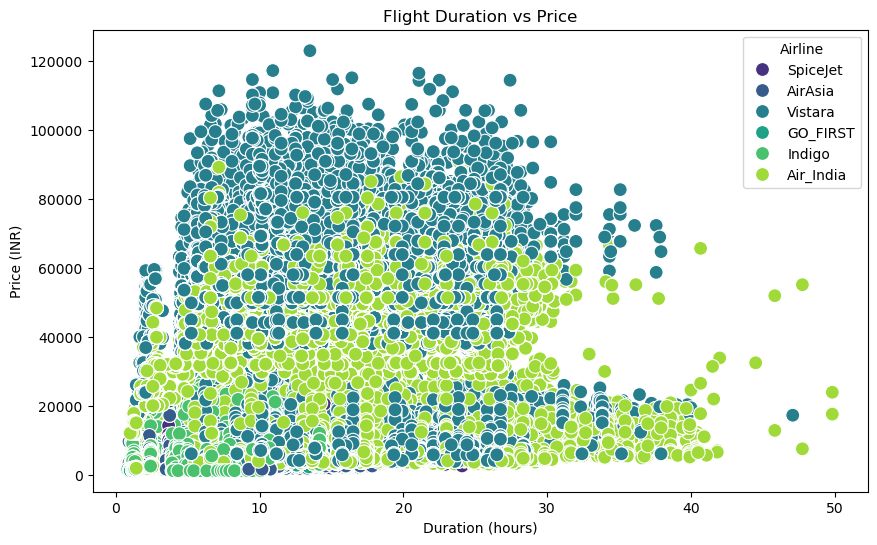

In [31]:
# Create the scatter plot with color coding
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='airline', palette='viridis', s=100)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (INR)')
plt.legend(title='Airline')
plt.show()

## Density plot
Univariate Density Plot:
The sns.kdeplot function with x='duration' creates a density plot for flight durations. fill=True fills the area under the curve, and color specifies the color.

Bivariate Density Plot:
sns.kdeplot with both x and y arguments shows the density of points in a 2D space. The cmap parameter specifies the color map used to represent density levels.

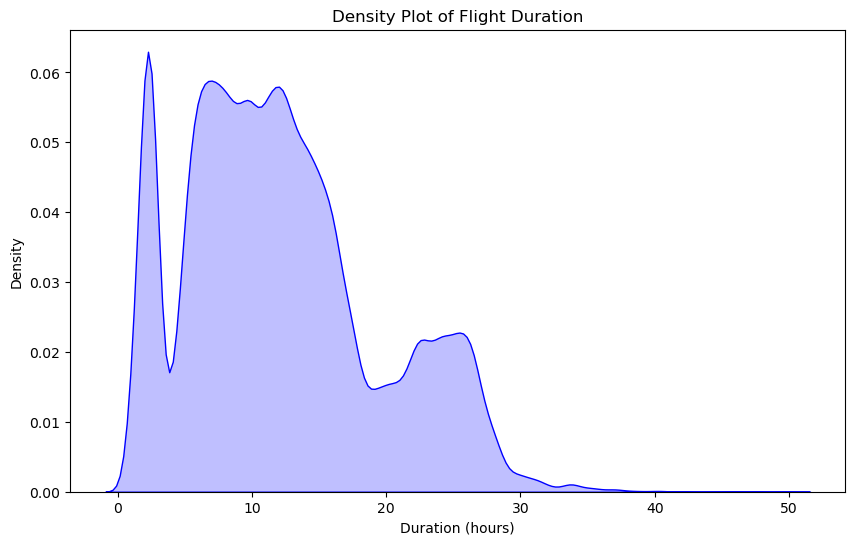

In [49]:
# Create the univariate density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='duration', fill=True, color='blue')
plt.title('Density Plot of Flight Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Density')
plt.show()

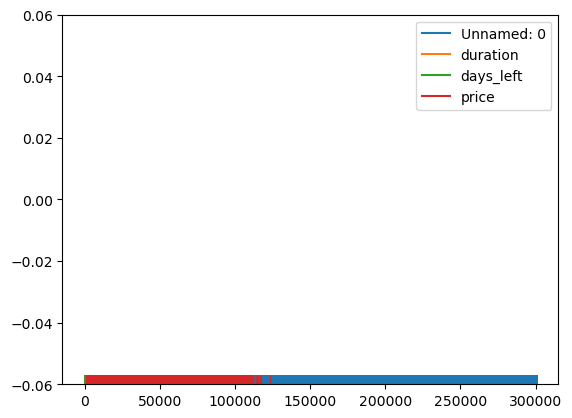

In [47]:
sns.rugplot(df)
plt.show()